## The Data Overview :

This dataset contains anonymized information about customer subscriptions and their interaction with the service. The data includes various features such as subscription type, payment method, viewing preferences, customer support interactions, and other relevant attributes. It consists of three files such as "test.csv", "train.csv", "data_descriptions.csv".

The Data Description

CustomerID: Unique identifier for each customer

SubscriptionType: Type of subscription plan chosen by the customer (e.g., Basic, Premium, Deluxe)

PaymentMethod: Method used for payment (e.g., Credit Card, Electronic Check, PayPal)

PaperlessBilling: Whether the customer uses paperless billing (Yes/No)

ContentType: Type of content accessed by the customer (e.g., Movies, TV Shows, Documentaries)

MultiDeviceAccess: Whether the customer has access on multiple devices (Yes/No)

DeviceRegistered: Device registered by the customer (e.g., Smartphone, Smart TV, Laptop)

GenrePreference: Genre preference of the customer (e.g., Action, Drama, Comedy)

Gender: Gender of the customer (Male/Female)

ParentalControl: Whether parental control is enabled (Yes/No)

SubtitlesEnabled: Whether subtitles are enabled (Yes/No)

AccountAge: Age of the customer's subscription account (in months)

MonthlyCharges: Monthly subscription charges

TotalCharges: Total charges incurred by the customer

ViewingHoursPerWeek: Average number of viewing hours per week

SupportTicketsPerMonth: Number of customer support tickets raised per month

AverageViewingDuration: Average duration of each viewing session

ContentDownloadsPerMonth: Number of content downloads per month

UserRating: Customer satisfaction rating (1 to 5)

WatchlistSize: Size of the customer's content watchlist

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd



In [2]:

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('train.csv')

In [3]:
data.head()


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
data.isna().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

Note: `dtypes` is a property of `DataFrame` because it directly exposes the metadata of the object rather than performing any operation or requiring input like a function would.

In [5]:
data.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [6]:
data=data.drop(columns=['CustomerID'])

In [7]:
def describe_object(df):
    for col in df.select_dtypes(include = ['object']).columns:
        print(f"For {col} : ", df[col].unique())


describe_object(data)

For SubscriptionType :  ['Premium' 'Basic' 'Standard']
For PaymentMethod :  ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
For PaperlessBilling :  ['No' 'Yes']
For ContentType :  ['Both' 'Movies' 'TV Shows']
For MultiDeviceAccess :  ['No' 'Yes']
For DeviceRegistered :  ['Mobile' 'Tablet' 'Computer' 'TV']
For GenrePreference :  ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
For Gender :  ['Male' 'Female']
For ParentalControl :  ['No' 'Yes']
For SubtitlesEnabled :  ['No' 'Yes']


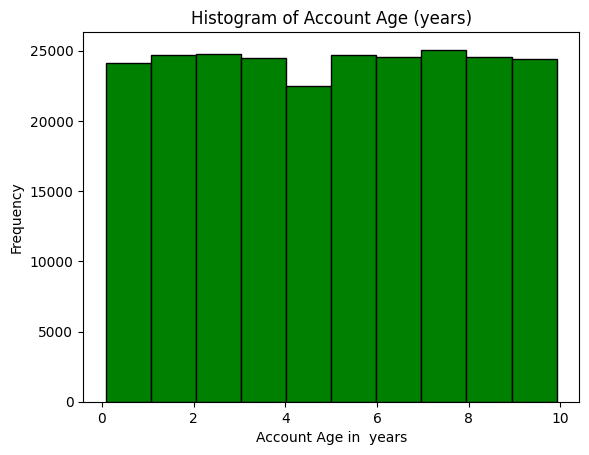

In [8]:
import matplotlib.pyplot as plt

# Create histogram using Pandas & Matplotlib
plt.hist(data['AccountAge']/12, bins=10, color='green', edgecolor='black')
plt.title(f'Histogram of Account Age (years)')
plt.xlabel('Account Age in  years')
plt.ylabel('Frequency')
plt.show()

In [9]:
data['AccountAgeYears']=round(data['AccountAge']/12,1)
data.groupby('AccountAgeYears')['Churn'].count()

AccountAgeYears
0.1    2015
0.2    3982
0.3    2028
0.4    1967
0.5    2088
       ... 
9.5    2006
9.6    2017
9.7    2064
9.8    4074
9.9    2071
Name: Churn, Length: 99, dtype: int64

In [10]:
data.select_dtypes(include=['number']).corr()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn,AccountAgeYears
AccountAge,1.000000,0.001706,0.820144,-0.001640,0.000191,0.001220,0.000440,-0.002055,-0.002640,-0.197736,0.999946
MonthlyCharges,0.001706,1.000000,0.498207,-0.003029,-0.000604,-0.000127,0.000056,0.000071,-0.000540,0.100473,0.001719
TotalCharges,0.820144,0.498207,1.000000,-0.003006,0.000860,0.000208,0.000609,-0.001770,-0.001770,-0.120529,0.820109
ViewingHoursPerWeek,-0.001640,-0.003029,-0.003006,1.000000,0.000949,0.002149,-0.003185,0.000788,-0.000750,-0.128645,-0.001622
AverageViewingDuration,0.000191,-0.000604,0.000860,0.000949,1.000000,-0.002397,-0.000406,-0.000158,0.000749,-0.146897,0.000197
ContentDownloadsPerMonth,0.001220,-0.000127,0.000208,0.002149,-0.002397,1.000000,0.001294,-0.000497,0.002324,-0.129752,0.001209
UserRating,0.000440,0.000056,0.000609,-0.003185,-0.000406,0.001294,1.000000,-0.000142,0.002567,0.022124,0.000435
SupportTicketsPerMonth,-0.002055,0.000071,-0.001770,0.000788,-0.000158,-0.000497,-0.000142,1.000000,0.001250,0.084064,-0.002061
WatchlistSize,-0.002640,-0.000540,-0.001770,-0.000750,0.000749,0.002324,0.002567,0.001250,1.000000,0.021739,-0.002637
Churn,-0.197736,0.100473,-0.120529,-0.128645,-0.146897,-0.129752,0.022124,0.084064,0.021739,1.000000,-0.197727


In [11]:
y = data['Churn']  # Target variable
# Define the feature columns (all columns except 'Churn')
X = data.drop(columns=['Churn'])

In [12]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (195029, 20)
X_test shape: (48758, 20)
y_train shape: (195029,)
y_test shape: (48758,)


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = X.select_dtypes(include = ['number']).columns.to_list()
categorical_features =X.select_dtypes(include = ['object']).columns.to_list()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))                     # One-hot encode categories
])


# Combine preprocessors into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [ ]:
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', SGDClassifier())             # ML model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['AccountAge',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'ViewingHoursPerWeek',
                                                   'AverageViewingDuration',
                                                   'ContentDownloadsPerMonth',
                                                   'UserRating',
                                                   'SupportTicketsPerMonth',
                                                   'WatchlistSize',
                                                   'AccountAgeYears']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SubscriptionType',
                                                   'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'ContentType',
                                                   'MultiDeviceAccess',
                                                   'DeviceRegistered',
                                                   'GenrePreference', 'Gender',
                                                   'ParentalControl',
                                                   'SubtitlesEnabled'])])),
                ('model', SGDClassifier())])

In [16]:
# Make predictions
predictions = pipeline.predict(X_test)
print("Predictions:", predictions)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions, y_test)
print("Accuracy:", accuracy)

Predictions: [0 0 0 ... 0 0 0]
Accuracy: 0.8062266704950982


In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=5)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall", recall_score(y_train,Y_train_pred))

[[145169  14468]
 [ 25965   9427]]
Precision 0.3945176815233312
Recall 0.2663596292947559


In [26]:
from sklearn.ensemble import RandomForestClassifier

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', RandomForestClassifier())             # ML model
])

# Fit the pipeline
pipeline_RF.fit(X_train, y_train)

Y_train_pred = cross_val_predict(pipeline_RF, X_train, y_train, cv=5)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall",recall_score(y_train,Y_train_pred))

[[157807   1830]
 [ 32937   2455]]
Precision 0.572928821470245
Recall 0.06936595840867993


In [30]:
from sklearn.linear_model import LogisticRegression

pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),                 # Preprocessing step
    ('model', LogisticRegression())             # ML model
])



Y_train_pred = cross_val_predict(pipeline_LR, X_train, y_train, cv=5)

print(confusion_matrix(y_train,Y_train_pred))
print("Precision", precision_score(y_train,Y_train_pred))
print("Recall",recall_score(y_train,Y_train_pred))

c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[[156730   2907]
 [ 31474   3918]]
Precision 0.5740659340659341
Recall 0.11070298372513562


c:\Users\nandi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
